<a href="https://colab.research.google.com/github/Yuri-Njathi/PyTorch-Blitz-in-60-minutes/blob/main/Deep_Learning_with_PyTorch_Blitz_60_min_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. Tensors

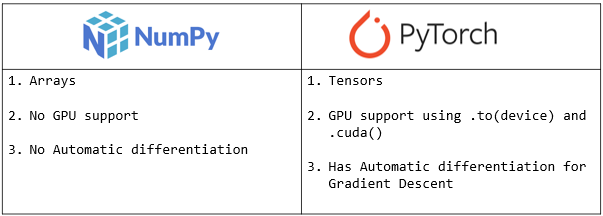

In [ ]:
import numpy as np
import torch

data = [[1,2],[3,4]]
arr, tensor = np.array(data), torch.tensor(data)
print(arr)
print(tensor)

[[1 2]
 [3 4]]
tensor([[1, 2],
        [3, 4]])


In [ ]:
# GPU support
tensor1 = tensor.to('cuda')
tensor1

tensor([[1, 2],
        [3, 4]], device='cuda:0')

In [ ]:
# GPU Support
tensor2 = tensor.cuda()
tensor2

tensor([[1, 2],
        [3, 4]], device='cuda:0')

In [ ]:
tensor

tensor([[1, 2],
        [3, 4]])

# Automatic Differentiation

In [ ]:
x = torch.tensor(4.0, requires_grad=True)
y = x**2
y.backward()
print(x.grad) #dy/dx = 2x = 8.0

tensor(8.)


# GPU utilization

In [ ]:
!nvidia-smi

Thu Oct  3 21:23:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Installation

In [ ]:
!pip install torch

# Import

In [ ]:
import torch
torch.cuda.is_available() #check for GPU

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Tensor Initialization

1. From data

2. From a NumPy Array

3. From another tensor

4. With random or constant values

## 1. Directly from data

In [ ]:
data = [[2,5],[6,7]]
t_data = torch.tensor(data)
print(f"tensor : {t_data}")
print(f"tensor data type : {t_data.dtype}")
print(f"tensor shape : {t_data.shape}")
print(f"tensor device : {t_data.device}")

tensor : tensor([[2, 5],
        [6, 7]])
tensor data type : torch.int64
tensor shape : torch.Size([2, 2])
tensor device : cpu


## From a Numpy array

In [ ]:
import numpy as np
np_array = np.array(data)
t_np = torch.from_numpy(np_array)
t_np

tensor([[2, 5],
        [6, 7]])

## From another tensor

- Retains previous tensor shape and properties unless stated

In [ ]:
x_ones = torch.ones_like(t_data)
print(f"Ones tensor : {x_ones}\n")
print(f"tensor dtype : {x_ones.dtype}")

Ones tensor : tensor([[1, 1],
        [1, 1]])

tensor dtype : torch.int64


In [ ]:
x_rand = torch.rand_like(t_data, dtype=torch.float) #
print(f"Random tensor : {x_rand}\n")
print(f"random tensor dtype : {x_rand.dtype}")

Random tensor : tensor([[0.2438, 0.4507],
        [0.8948, 0.5060]])

random tensor dtype : torch.float32


# With random or constant values

In [ ]:
shape = (2,3) #rows, columns
r_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

In [ ]:
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
ones_tensor.to(device)

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')

In [ ]:
zeros_tensor.shape

torch.Size([2, 3])

In [ ]:
zeros_tensor.dtype

torch.float32

In [ ]:
zeros_tensor.device

device(type='cpu')

In [ ]:
ones_tensor.shape

torch.Size([2, 3])

In [ ]:
ones_tensor.dtype

torch.float32

In [ ]:
ones_tensor.device

device(type='cpu')

In [ ]:
ones_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

# Tensor Operations

indexing and slicing

In [ ]:
ones_tensor[:,1]=2
ones_tensor

tensor([[1., 2., 1.],
        [1., 2., 1.]])

Joining tensors

In [ ]:
t1 = torch.cat([ones_tensor,ones_tensor,ones_tensor],dim=1)

In [ ]:
t1

tensor([[1., 2., 1., 1., 2., 1., 1., 2., 1.],
        [1., 2., 1., 1., 2., 1., 1., 2., 1.]])

In [ ]:
t1.shape

torch.Size([2, 9])

multiplying tensors

In [ ]:
'''
syntax
tensor1.mul(tensor2)
tensor1*tensor2
'''
r_tensor * ones_tensor

tensor([[0.3265, 0.1709, 0.8143],
        [0.4131, 0.5832, 0.8342]])

In [ ]:
t4 = ones_tensor*2
t4

tensor([[2., 2., 2.],
        [2., 2., 2.]])

In [ ]:
t4.T

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])

In [ ]:
ones_tensor*t4

tensor([[2., 2., 2.],
        [2., 2., 2.]])

matrix multiplication

In [ ]:
'''
syntax
tensor1.matmul(tensor1.T)

tensor @ tensor.T
'''
t3 = ones_tensor*t4
t4 @ t3.T

tensor([[12., 12.],
        [12., 12.]])

### In place operation

In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss of history.

!!!! Hence, their use is discouraged !!!!

In [ ]:
t4

tensor([[2., 2., 2.],
        [2., 2., 2.]])

In [ ]:
t4.add_(5)

tensor([[7., 7., 7.],
        [7., 7., 7.]])

## Bridge with NumPy
Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.

# Tensor to NumPy array and vice versa

A change in the tensor reflects in the Numpy array bcoz Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.

In [ ]:
n_array = t4.numpy()

In [ ]:
t4.add_(10)

tensor([[17., 17., 17.],
        [17., 17., 17.]])

In [ ]:
n_array

array([[17., 19., 17.],
       [17., 19., 17.]], dtype=float32)

numpy array to tensor

In [ ]:
t_from_array = torch.from_numpy(np_array)

In [ ]:
t_from_array

tensor([[2, 5],
        [6, 7]])

In [ ]:
np.add(np_array,1,out=np_array)

array([[3, 6],
       [7, 8]])

In [ ]:
t_from_array

tensor([[3, 6],
        [7, 8]])

# B. Autograd
`torch.autograd` enables PyTorch's auto-differentiation engine.

Training happens in two steps:
- Forward Prop (NN makes best guess)

- Back Propagation (NN adjusts parameters) proportionate to loss

In [ ]:
#simple differentiation
import torch #dy/dx of x^2
x = torch.tensor([2.0,3.0,255.0], requires_grad=True)
y = x**2
y.sum().backward()
print(x.grad) #dy/dx = 2x = 4

In [ ]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
Q = 3*a**3 - b**2

In [ ]:
external_grad = torch.tensor([1., 1.]) #9a^2 = 36, 81 # -2b = -12, -8
Q.backward(gradient=external_grad)

In [ ]:
print(a.grad)
print(b.grad)

## Understand why & how optimizing is done

In [ ]:
from torchvision.models import resnet18, ResNet18_Weights #get resnet18
model = resnet18(weights=ResNet18_Weights.DEFAULT) #imagenet weights

data = torch.rand(1, 3, 64, 64)


labels = torch.rand(1, 1000, requires_grad=True)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False #.freeze

model.fc = nn.Linear(512, 10)#, requires_grad=True) #dense , activation = relu or softmax # dense = linear layer (y = mx+c) an activation

# Optimize only the classifier
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

# C. Neural Networks

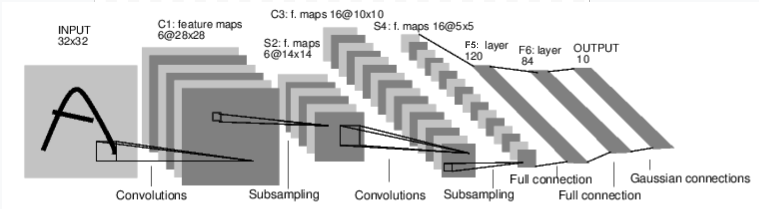

define the network

In [1]:
# ########
# class model(nn.Module):
#   def __init__(self):
#     super(Net, self).__init__()
#     #self.layers
#   def forward(self,input):
#     #setup network path
# ########

Example

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, input):
        # Convolution layer C1: 1 input image channel, 6 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a Tensor with size (N, 6, 28, 28), where N is the size of the batch
        c1 = F.relu(self.conv1(input))
        # Subsampling layer S2: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 6, 14, 14) Tensor
        s2 = F.max_pool2d(c1, (2, 2))
        # Convolution layer C3: 6 input channels, 16 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a (N, 16, 10, 10) Tensor
        c3 = F.relu(self.conv2(s2))
        # Subsampling layer S4: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 16, 5, 5) Tensor
        s4 = F.max_pool2d(c3, 2)
        # Flatten operation: purely functional, outputs a (N, 400) Tensor
        s4 = torch.flatten(s4, 1)
        # Fully connected layer F5: (N, 400) Tensor input,
        # and outputs a (N, 120) Tensor, it uses RELU activation function
        f5 = F.relu(self.fc1(s4))
        # Fully connected layer F6: (N, 120) Tensor input,
        # and outputs a (N, 84) Tensor, it uses RELU activation function
        f6 = F.relu(self.fc2(f5))
        # Gaussian layer OUTPUT: (N, 84) Tensor input, and
        # outputs a (N, 10) Tensor
        output = self.fc3(f6)
        return output

device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [5]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [11]:
# for param in net.parameters():
#   print(param)

In [9]:
input = torch.ones(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.1033,  0.0474,  0.0494, -0.0745, -0.1132, -0.1225,  0.0113,  0.0242,
         -0.1037, -0.0655]], grad_fn=<AddmmBackward0>)


In [19]:
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2, momentum=0.9)

# Loss function )forward prop)

In [20]:
output = net(input) #forward pass #prediction

target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.9594, grad_fn=<MseLossBackward0>)


reduce loss

In [21]:
optimizer.zero_grad()
loss.backward() #back propagation
optimizer.step()

In [22]:
output = net(input) #forward pass #prediction
loss = criterion(output, target)
print(loss)

tensor(1.9478, grad_fn=<MseLossBackward0>)


In [23]:
optimizer.zero_grad()
loss.backward() #back propagation
optimizer.step()

In [24]:
output = net(input) #forward pass #prediction
loss = criterion(output, target)
print(loss)

tensor(1.9263, grad_fn=<MseLossBackward0>)


# D. Training a classifier

1. get dataset

2. Define CNN

3. Define loss function

4. Train network

5. Test the network


In [25]:
import torch
import torchvision
import torchvision.transforms as transforms

# Get dataset

In [26]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:04<00:00, 39148876.39it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


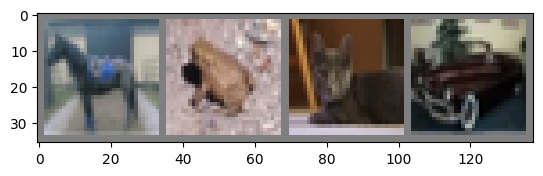

horse frog  cat   car  


In [27]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

2. Define CNN

In [28]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x)) #dense layer
        x = F.relu(self.fc2(x)) #dense layer
        x = self.fc3(x) #dense layer without activation
        return x


net = Net()

3. Define loss function

In [29]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss() #computes the cross entropy loss between input logits and target.
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

4. Train the network

Loop over data iterator & feed the inputs to the network

In [30]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.244
[1,  4000] loss: 1.906
[1,  6000] loss: 1.702
[1,  8000] loss: 1.611
[1, 10000] loss: 1.533
[1, 12000] loss: 1.503
[2,  2000] loss: 1.422
[2,  4000] loss: 1.373
[2,  6000] loss: 1.356
[2,  8000] loss: 1.345
[2, 10000] loss: 1.291
[2, 12000] loss: 1.307
Finished Training


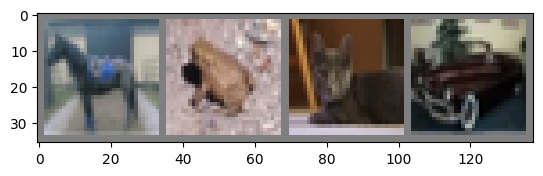

horse dog   ship  horse


In [33]:
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [34]:
net(images)
# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

tensor([[ 0.2911, -1.7558,  1.9231,  0.6317,  1.4177,  1.1248, -1.9710,  3.3629,
         -2.6546, -1.5185],
        [-0.3781, -1.3819,  0.7377,  1.0242,  1.3071,  0.5239,  2.0667, -1.0136,
         -0.7806, -1.3773],
        [-1.7209, -0.2004, -0.1540,  1.9689,  0.3816,  1.2110,  1.1411, -0.2342,
         -2.3009,  0.0687],
        [-0.7213,  2.0537, -0.1690,  0.2631, -1.3823, -0.0343, -0.2921, -0.8993,
         -1.6137,  1.4595]], grad_fn=<AddmmBackward0>)

In [32]:
PATH = './cifar_net.pt'
torch.save(net.state_dict(), PATH)